 # Final Project
 File: DSC530_Paulovici_Final_Project.py (.ipynb)<br>
 Name: Kevin Paulovici<br>
 Date: 11/16/2019<br>
 Course: DSC 530 Data Exploration and Analysis<br>
 Assignment: Final Project Analysis

 ## Questions / Hypothesis
 · Is the strongest lineup the perfect lineup? <br><br>
 · Is one type of Pokémon clearly stronger than others?<br><br>
 · What stat is most important when considering overall strength?<br><br>
 · Where do the elite four Pokémon stand against other Pokémon?<br><br>
 · Can you simulate a mock battle to determine outcome?<br><br>
 · What limitations are there?<br><br>

 # Tasks
 1) A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book).  Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1). <br> <br>
 2) Describe what the 5 variables mean in the dataset (Chapter 1). <br> <br>
 3) Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2). <br> <br>
 4) Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2). <br> <br>
 5) Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF.  Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario.  Almost like a filter.  The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3) <br> <br>
 6) Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4). <br> <br>
 7) Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5). <br> <br>
 8) Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and NonLinear Relationships should also be considered during your analysis (Chapter 7). <br> <br>
 9) Conduct a test on your hypothesis using one of the methods covered in Chapter 9. <br> <br>
 10) For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

 ## Database Info
 Database: pokemon.csv retrieved from https://www.kaggle.com/rounakbanik/pokemon

 ## Elite four Info
 The questions / hypothesis are relative to generation pokemon elite four.
 Data is retrieved from https://www.serebii.net/rb/elitefour.shtml <br> <br>
 person: [pokemon] <br> <br>
 elite4 = {'Lorelei':['Dewgong,Cloyster','Slowbro','Jynx','Lapras'],
           'Bruno':['Onix','Hitmonchan','Hitmonlee','Onix','Machamp'],
           'Agatha':['Gengar','Golbat','Haunter','Arbok','Gengar'],
           'Lance':['Gyarados','Dragonair','Dragonair','Aerodactyl','Dragonite']}

In [1]:
import PokeBattle

import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats

from matplotlib import pyplot as plt
import seaborn as sns

from empyrical_dist import Pmf
from empyrical_dist import Cdf

import thinkplot
import thinkstats2
import hypothesis_short # modified version to remove lib dependencies
import statsmodels.formula.api as smf


 ## Functions for tasks and extra analysis

In [2]:
def cleanDataFrame(df, cols, gen=1):
    """ function to clean up a df, only keeps provided cols and specific to a generation
    of pokemon

    @param: df (dataframe) - raw datafram
    @param: cols (list) - columns in the df to use
    @param: gen (int) - pokemon generation to include (rows)

    return: df - clean dataframe
    """
    df = df[cols].loc[df['generation'] == gen]

    return df


In [3]:
def makeHist(col, title, xlab, ylab, bins, width):
    """ function to make histogram of variables

    @param: col (series) - data to plot from a df
    @param: title (str) - title of plot
    @param: xlab (str) - xlabel of plot
    @param: ylab (str) - xlabel of plot
    @param: bins (int) - # of bins to use
    @param: width (float) - bin width 
    """
    plt.style.use('ggplot')

    plt.hist(col, bins=bins, rwidth=width, edgecolor='black')

    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.tight_layout
    plt.show()


In [4]:
def basicStats(col):
    """ function to find basic stats of variables
    
    @param: col (str) - name of column 

    return:
    high - max value of series
    low - min value of series
    mn - mean value of series
    med - median value of series
    """
    high = col.max()
    low = col.min()
    mn = col.mean()
    med = col.median()

    return high, low, mn, med


In [5]:
def binCalc(col):
    """ function to determine the bins and width
    
    @param: col (str) - name of column     

    returns:
    @param: bin - bins to use
    @param: binWidth - bin width to use
    """
    bin = math.ceil(math.sqrt(col.count()))

    high, low, _, _ = basicStats(col)
    binWidth = (high - low) / bin

    return bin, binWidth


In [6]:
def pokeStats(df, poke, cols, title="Elite Four Stats"):
    """ function to determine the stats of pokemon

    @param: df (dataframe) - dataframe of pokemone data
    @param: poke (list) - list of pokemon
    @param: cols (list) - list of columns in the df to consider
    """
    pokeStats = {}
    pokeStatsSum = {}

    # populate the diction with empty list {"var":[]} or {"var":()}
    for var in cols:
        pokeStats[var] = []

    # loop through each pokemon's coluums and get its stats
    for key, val in pokeStats.items():
        for p in elite4Pokemon:
            val.append(df.loc[df["name"] == p].iloc[0][key])

        stats = max(val), min(val), statistics.mean(val), statistics.median(val)
        pokeStatsSum[key] = stats

    # print out the stats
    print(title)
    print("{:10}\t{}\t{}\t{}\t{}".format("Variables", "Max", "Min", "Mean", "Median"))
    
    for var in cols:
        print("{:10}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
            var, pokeStatsSum[var][0], pokeStatsSum[var][1], 
            pokeStatsSum[var][2], pokeStatsSum[var][3]))


In [7]:
def plotPmfs(p1, p2, l1, l2 ,t):
    """ function to plot pmfs

    @param: p1 & p2 (Pmf) - pmf object to plot
    @param: l1 & l1 (str) - name of label
    @param: t (str) - name of title (var being used)
    """
    plt.style.use("ggplot")
    width = 0.15

    plt.bar(p1.qs, p1.ps, label=l1)
    plt.bar(p2.qs + width, p2.ps, label=l2)

    plt.legend()
    plt.title("PMF of Water and Others (" + t + ")")
    plt.xlabel(t)
    plt.ylabel("PMF")
    plt.tight_layout()
    plt.show()


In [8]:
def plotCdfs(p1, l1, t1):
    """ function to plot cdf

    @param: p1 (Cdf) - cdf object to plot
    @param: l1 (str) - name of label
    @param: t (str) - name of title (var being used)
    """
    plt.style.use("ggplot")

    plt.plot(p1.qs, p1.ps, label=l1)

    plt.title("CDF of " + t)
    plt.xlabel(t)
    plt.ylabel("CDF")
    plt.tight_layout()
    plt.show()


In [9]:
def plotDist(data):
    """ function to plot normal probability plot

    @param: data (series) - data to be ploted
    """
    n = 30
    thinkplot.PrePlot(3) 

    mus = [0, 1, 5]
    sigmas = [1, 1, 2]

    for mu, sigma in zip(mus, sigmas):
        sample = data.sample(n=n)
        xs, ys = thinkstats2.NormalProbability(sample)
        label = '$\mu=%d$, $\sigma=%d$' % (mu, sigma)
        thinkplot.Plot(xs, ys, label=label)

    thinkplot.Config(title='Normal probability plot',
                    xlabel='standard normal sample',
                    ylabel='sample values')


In [10]:
def plotScatter(var1, var2, l1, l2):
    """ function to plot two vars on a scatter plot 

    @param: var1 & var2 (series) - data to be plotted from dataframe
    @param: l1 & l2 (str) - labels for data series
    """
    plt.style.use("ggplot")

    plt.scatter(var1, var2, alpha=0.5)

    plt.title(l1 + " vs. " + l2)
    plt.xlabel(l1)
    plt.ylabel(l2)
    plt.tight_layout()
    plt.show()


In [11]:
def plotScatter2(df, type1, title, xl, yl, var):
    """ function to plot two vars on a scatter plot 

    @param: df (dataframe) - data 
    @param: type1 (list) - list of type
    @param: title (str) - title 
    @param: xl & yl (str) - axis labels 
    @param: var (str) - variable to compare
    """
    plt.style.use("ggplot")

    for t in type1:
        df_scatter = df.loc[df["type1"] == t]
        plt.scatter(df_scatter.base_total, df_scatter[var], label=t)

    plt.title("Comparison of Attack for types")
    plt.xlabel("base_total")
    plt.ylabel("attack")
    plt.legend()
    plt.tight_layout()
    plt.show()


 ## Task 1
 A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book).  Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

In [12]:
# read in data
df_all = pd.read_csv('pokemon.csv')

# set col of interest
cols = "name hp	attack defense sp_attack sp_defense	speed base_total type1 type2 generation".split()

df = cleanDataFrame(df_all, cols)

df.head()


,name,hp,attack,defense,sp_attack,sp_defense,speed,base_total,type1,type2,generation
0,Bulbasaur,45,49,49,65,65,45,318,grass,poison,1
1,Ivysaur,60,62,63,80,80,60,405,grass,poison,1
2,Venusaur,80,100,123,122,120,80,625,grass,poison,1
3,Charmander,39,52,43,60,50,65,309,fire,NaN,1
4,Charmeleon,58,64,58,80,65,80,405,fire,NaN,1


 ### Task 1 Summary
 Since most of the columns are unnecessary, lets limits the df to the cols that are useful and described in Task 2.
 Additionally, we only want to consider generation 1 pokemon (better match up with elite four) which is the default for the cleanDataFrame function.

 ## Task 2
 Describe what the 5 variables mean in the dataset (Chapter 1).

 ### Task 2 Summary
 #### Variable desciptions
 name - The English name of the Pokemon <br>
 hp* - The Base hitpoint (HP) of the Pokemon <br>
 attack* - The Base Attack of the Pokemon <br>
 defense* - The Base Defense of the Pokemon <br>
 sp_attack* - The Base Special Attack of the Pokemon <br>
 sp_defense* - The Base Special Defense of the Pokemon <br>
 speed* - The Base Speed of the Pokemon <br>
 base_total* - The Base total of the Pokemon <br>
 type1* - The Primary Type of the Pokemon <br>
 type2  - The Secondary Type of the Pokemon <br>
 generation - The numbered generation which the Pokemon was first introduced <br>
 note, italics are variables selected to further evaluate and help answer questions/hypothesis <br><br>
 base_total is the sum of attack, defense, sp_attack, sp_defense, speed, and hp. Summing these together gives a simple determination of strength without needing to take into account indivigual pieces for a battle. These variables along with type1 will get used to determine which pokemon are most useful against the elite four.

 ## Task 3
 Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

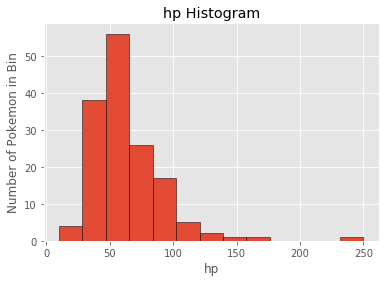

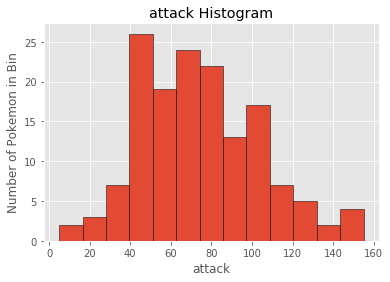

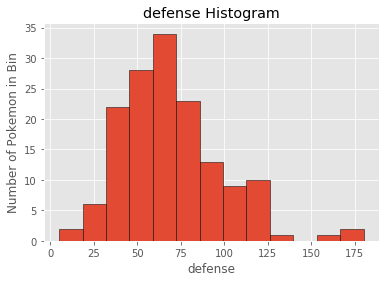

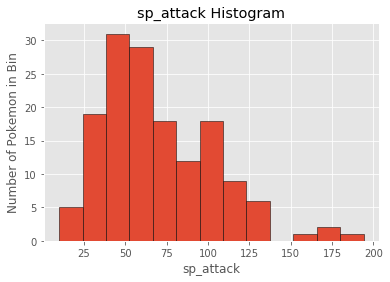

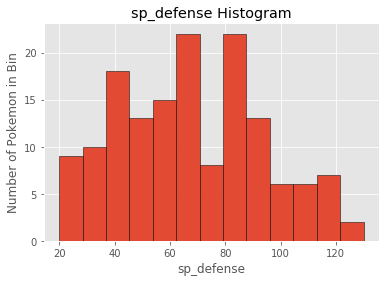

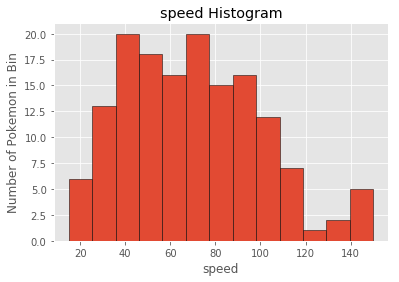

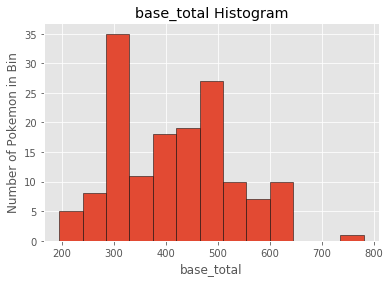

In [13]:
"""
col - is the series data
t - title
x - xlabel
y - ylabel
bins - # of bins to use
rwidth - bin width
"""
col_vars = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "base_total"]

# loop through the variables and create histograms
for var in col_vars:
    col = df[var]
    t = var + " Histogram"
    x = var
    y = "Number of Pokemon in Bin"
    bins, rwidth = binCalc(col)
    makeHist(col, t, x, y, bins, rwidth)


 ### Task 3 Summary
 The type1 histogram was left out because that is does give a representative of stength vs count. Instead statter plots will be provied later on. The hp, defense, sp_attack, and base_total all show some outliers on the high end (right tail). However, these are expected and should be kept in. This a true representation of the data and expected that certain pokemon excel in certain aspects. Additionally, these outliers are expected to be part of the dream team to defeat the elite four pokemon.

 ## Task 4
 Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [14]:
# Using the basicStats function we determine the min, max, mean, and median

col_vars = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "base_total"]

# loop through the variables and determine stats
print("All Pokemon generation 1 Stats")
print("{:10}\t{}\t{}\t{}\t{}".format("Variables", "Max", "Min", "Mean", "Median"))
for var in col_vars:
    stats = basicStats(df[var])

    print("{:10}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        var, stats[0], stats[1], stats[2], stats[3]))


All Pokemon generation 1 Stats
Variables 	Max	Min	Mean	Median
hp        	250.00	10.00	64.34	60.00
attack    	155.00	5.00	74.53	70.00
defense   	180.00	5.00	70.08	65.00
sp_attack 	194.00	10.00	69.40	65.00
sp_defense	130.00	20.00	67.74	65.00
speed     	150.00	15.00	70.15	70.00
base_total	780.00	195.00	416.25	410.00


In [15]:
# We also want to compare these values to the elite four pokemon, so we'll use the pokeStats function
elite4 = {'Lorelei':['Dewgong','Cloyster','Slowbro','Jynx','Lapras'],
'Bruno':['Onix','Hitmonchan','Hitmonlee','Onix','Machamp'], 
'Agatha':['Gengar','Golbat','Haunter','Arbok','Gengar'],
'Lance':['Gyarados','Dragonair','Dragonair','Aerodactyl','Dragonite']}

#list of elite four pokemon
elite4Pokemon = [v for key, val in elite4.items() for v in val]

pokeStats(df, elite4Pokemon, col_vars)


Elite Four Stats
Variables 	Max	Min	Mean	Median
hp        	130.00	35.00	68.00	61.00
attack    	155.00	45.00	88.00	84.00
defense   	180.00	35.00	92.00	80.00
sp_attack 	170.00	30.00	82.00	70.00
sp_defense	130.00	45.00	83.00	90.00
speed     	150.00	30.00	82.00	78.00
base_total	640.00	385.00	498.00	465.00


 ### Task 4 Summary
 Looking at the stats above for each variable gives us a sense of how the elite four pokemon stack up compared to the population. By looking at the max values, we can see that generally the elite four pokemon are at the top or near the top end of stregth. This is further confirmed by looking at the mean of pokemon. We can see the elite four average is higher than the general population. This gives evidence that we would need to focus on the higher end of base_total to create a dream team. We'll have to wait till a later analysis to see how this hypothesis fairs when a battle simulation occurs to determin it's effectiveness.

 ## Task 5
 Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF.  Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario.  Almost like a filter.  The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3)

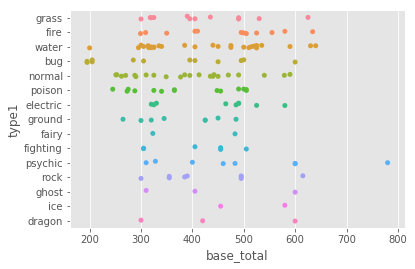

In [16]:
# using the type1 variable to filter out results - first we need to determine which 
# type is generally stronger with a scatter plot
sns.stripplot(y="type1", x="base_total", data=df, jitter=True)


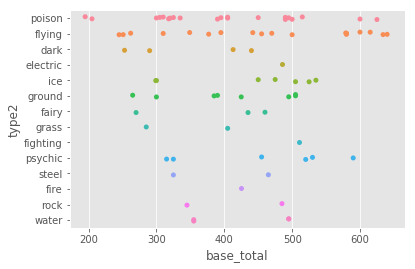

In [17]:
# The primary type (type1) did not show any one type that significant. 
# Results looks reasonable spread over various types. So, we look at 
# secondary types (type2) to see if we can determine anything else.
sns.stripplot(y="type2", x="base_total", data=df, jitter=True)


AxesSubplot(0.125,0.125;0.775x0.755)


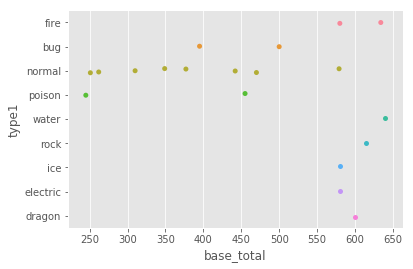

In [18]:
# The secondary type (type2) did show that flying types are more often on the high end of strength.
# So, we'll filter out non-flying types and revisit the primary types
print(sns.stripplot(y="type1", x="base_total", data=df.loc[df["type2"] == "flying"], jitter=True))


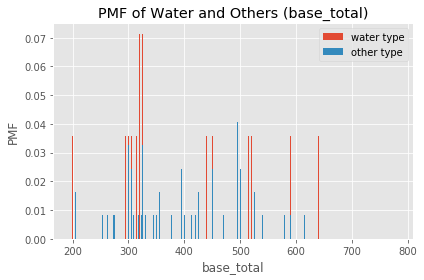

In [19]:
# Again we still see a reasonable spread of strong types with no clear indication which one type is stronger than others.
# Thus, we will take a representative type to compare to other types

# df for type1 = water
df_water = df.loc[df["type1"] == "water"]

# df for type1 != water
df_not_water = df.loc[df["type1"] != "water"]

# create pmfs of each object using the empyrical_dist library
pmf_col = "base_total"
water_pmf = Pmf.from_seq(df_water[pmf_col])
not_water_pmf = Pmf.from_seq(df_not_water[pmf_col])

plotPmfs(water_pmf, not_water_pmf, "water type", "other type", pmf_col)


 ### Task 5 Summary
 Due to the nature of the data, the pmfs are very low and spread out. This is expected. In the 300 range we see water has higher pmfs relative to others. On the upp end (500-650) we again see water tends to be higher. What this shows is that, a single type (water) of pokemon is not necessarily overwhelmingly stronger than others.

 ## Task 6
 Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

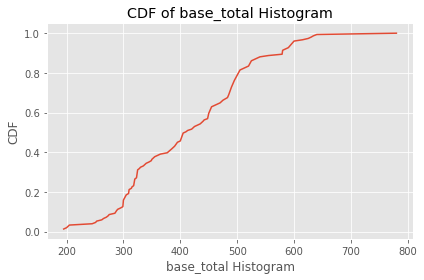

In [20]:
# using the "base_total" we can create a CDF to determine what percentile rank the elite four pokemon fall under

# create cdf
cdf_col = "base_total"
pokemon_cdf = Cdf.from_seq(df[cdf_col])

plotCdfs(pokemon_cdf, cdf_col, cdf_col)


 ### Task 6 Summary
 From Task 4, we know the max value of base_total for the elite four is: max - 640, min - 385, mean - 498, and median - 465. The cdf shows that the pokemon range from the ~40-95 percentile. From the mean to max, it is ~80-95 percentile range. Generally, we are going to need pokemon that fall into that upper category to create the dream team. Subsequent analysis will re-use pokeStats function to compare my lineup to others. <br> <br>
 Note - histogram should not be on the axis, not sure what is causing that

 ## Task 7
 Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

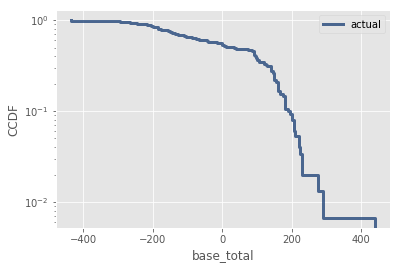

<Figure size 576x432 with 0 Axes>

In [21]:
# create cdf using thinkstats2
diff = df.base_total.diff()
cdf = thinkstats2.Cdf(diff, label='actual')

# plot the CCDF on a log scale to see if an exponential dist is appropriate
thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel="base_total", ylabel="CCDF", yscale="log")


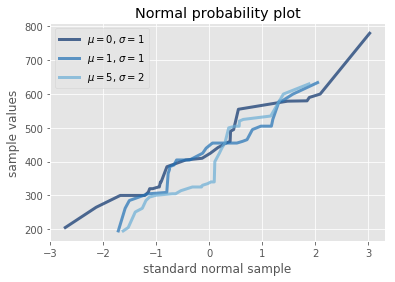

In [22]:
# Since the exponential dist doesn't fit, we'll try a normal dist. From Task 6 the cdf looks like a normal dist. 
# So we'll test it by plotting the normal probability plot, using the plotDist function from chapter 5 of thinkstats.
plotDist(df.base_total)



 ## Task 8
 Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and NonLinear Relationships should also be considered during your analysis (Chapter 7).

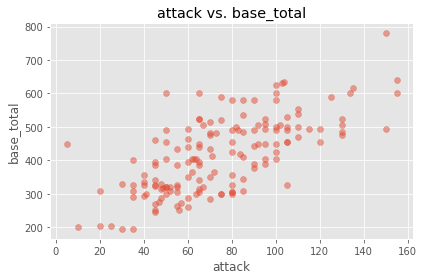

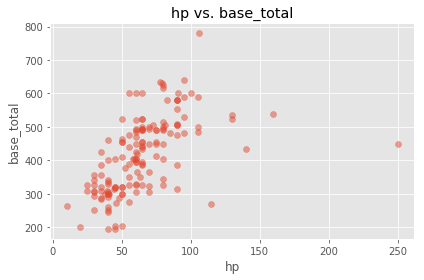

In [23]:
# base_total, hp, and attack are what I expect to be the most important in determining a pokemone strength. 
# So hp and attack will be compared to base_total

# scatter_data = [(df.base_total, df.hp, "base_total", "hp"),
# (df.base_total, df.attack, "base_total", "attack")]

scatter_data = [(df.attack, df.base_total, "attack", "base_total"), 
(df.hp, df.base_total, "hp", "base_total")]

for data in scatter_data:
    plotScatter(data[0], data[1], data[2], data[3])


In [24]:
# calculate the pearson correlation
pCorrAttack = df.attack.corr(df.base_total, method='pearson')
pCorrHp = df.hp.corr(df.base_total, method='pearson')

print("The correlation for attack is: {:.2f}".format(pCorrAttack))
print("The correlation for hp is: {:.2f}".format(pCorrHp))


The correlation for attack is: 0.69
The correlation for hp is: 0.55


 ### Task 8 Summary
 Both correlations indicate a strong linear relationship. This is expected, the plots visually demonstrate this, with the expection of a few outliers. However, it is also expected because the base_total variable is partially dirived from both the attack and hp variables.

 ## Task 9
 Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [25]:
# previously in Task 5 we said that water and not water were not that different in terms of strength. 
# We'll take a look at the difference in means to see if there is any statistical significance.
# Additionaly, lets rerun basicStats on base_total to see if there is a notable differnce.

# water
print("Water Pokemon Stats")
print("{:10}\t{}\t{}\t{}\t{}".format("Variables", "Max", "Min", "Mean", "Median"))

for var in col_vars:
    stats = basicStats(df_water[var])

    print("{:10}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        var, stats[0], stats[1], stats[2], stats[3]))


Water Pokemon Stats
Variables 	Max	Min	Mean	Median
hp        	130.00	20.00	64.54	59.50
attack    	155.00	10.00	72.04	66.00
defense   	180.00	35.00	81.79	74.00
sp_attack 	135.00	15.00	68.04	67.50
sp_defense	130.00	20.00	67.82	67.00
speed     	115.00	15.00	67.71	70.00
base_total	640.00	200.00	421.93	422.50


In [26]:
# not water
print("Not Water Pokemon Stats")
print("{:10}\t{}\t{}\t{}\t{}".format("Variables", "Max", "Min", "Mean", "Median"))

for var in col_vars:
    stats = basicStats(df_not_water[var])

    print("{:10}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        var, stats[0], stats[1], stats[2], stats[3]))


Not Water Pokemon Stats
Variables 	Max	Min	Mean	Median
hp        	250.00	10.00	64.30	60.00
attack    	155.00	5.00	75.10	71.00
defense   	160.00	5.00	67.41	65.00
sp_attack 	194.00	10.00	69.72	65.00
sp_defense	125.00	20.00	67.72	65.00
speed     	150.00	20.00	70.71	67.00
base_total	780.00	195.00	414.96	410.00


In [27]:
# given that not water types have a higher sample it is expected to see wider range of max - mins. 
# However, we can see the means for each variable is fairly close, confirming that they are fairly equal.

# difference in means from hypothesis_short
for var in col_vars:
    data = df_water[var].values, df_not_water[var].values
    ht = hypothesis_short.DiffMeansPermute(data)

    print("Pvalue for {} is: {}".format(var, ht.PValue()))


Pvalue for hp is: 0.97
Pvalue for attack is: 0.636
Pvalue for defense is: 0.013
Pvalue for sp_attack is: 0.819
Pvalue for sp_defense is: 0.984
Pvalue for speed is: 0.622
Pvalue for base_total is: 0.797


 ### Task 9 Summary
 From the PValues we can conclude there is not a statistical significace for most of variables with defense being the exception.

 ## Task 10
 For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [28]:
# multiple regression 
formula = 'base_total ~ hp + attack + defense + sp_attack + sp_defense + speed'
results = smf.ols(formula, data=df).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             base_total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.461e+30
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:24:54   Log-Likelihood:                 4077.4
No. Observations:                 151   AIC:                            -8141.
Df Residuals:                     144   BIC:                            -8120.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.137e-13   1.56e-13      0.729      0.467   -1.95e-13    4.22e-13
hp             1.0000   1.64e-15   6.09e+14      0.000       1.000       1.000
attack         1.0000   1.67e-15      6e+14      0.000       1.000       1.000
defense        1.0000   1.57e-15   6.39e+14      0.000       1.000       1.000
sp_attack      1.0000   1.48e-15   6.75e+14      0.000       1.000       1.000
sp_defense     1.0000   2.22e-15   4.51e+14      0.000       1.000       1.000
speed          1.0000   1.66e-15   6.01e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                        1.780   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.644
Skew:                          -0.255   Prob(JB):                        0.439
Kurtosis:                       2.973   Cond. No.                         727.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# the above mutiple regression told us what we alread knew - 
# all variables explain the dependent variable so lets just look at two 

# multiple regression 
formula = 'base_total ~ hp + attack + defense'
results = smf.ols(formula, data=df).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             base_total   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     93.79
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           5.72e-34
Time:                        17:24:54   Log-Likelihood:                -845.87
No. Observations:                 151   AIC:                             1700.
Df Residuals:                     147   BIC:                             1712.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    123.6207     18.503      6.681      0.000      87.054     160.188
hp             1.4880      0.200      7.455      0.000       1.094       1.882
attack         1.6754      0.214      7.840      0.000       1.253       2.098
defense        1.0276      0.210      4.890      0.000       0.612       1.443
==============================================================================
Omnibus:                       14.113   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.308
Skew:                           0.636   Prob(JB):                     0.000288
Kurtosis:                       3.988   Cond. No.                         433.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 ### Task 10 Summary
 By only looking at two of the variables we are lead to think that ~65% of base_total is explained by R-squared. This is most likely too high given what know about the other variables needed to equal base_total.

 ## Questions / Hypothesis Additional Analysis and Summary Results
 · Is the strongest lineup the perfect lineup? <br><br>
 · Is one type of Pokémon clearly stronger than others?<br><br>
 · What stat is most important when considering overall strength?<br><br>
 · Where do the elite four Pokémon stand against other Pokémon?<br><br>
 · Can you simulate a mock battle to determine outcome?<br><br>
 · What limitations are there?<br><br>

 ### Is the strongest lineup the perfect lineup?

In [30]:
"""
With the assumption, base_total (sum of: attack, defense, sp_attack, sp_defense, speed) 
as a measure of strength we need to determine the top 6 pokemon (limit) 
"""
df_dream_team = df.nlargest(6, ["base_total"])
dream_team = list(df_dream_team.name)
df_dream_team.head(6)

# we'll use this team to test their strength later


,name,hp,attack,defense,sp_attack,sp_defense,speed,base_total,type1,type2,generation
149,Mewtwo,106,150,70,194,120,140,780,psychic,NaN,1
129,Gyarados,95,155,109,70,130,81,640,water,flying,1
5,Charizard,78,104,78,159,115,100,634,fire,flying,1
8,Blastoise,79,103,120,135,115,78,630,water,NaN,1
2,Venusaur,80,100,123,122,120,80,625,grass,poison,1
141,Aerodactyl,80,135,85,70,95,150,615,rock,flying,1


 ### Is one type of Pokémon clearly stronger than others?

 Type is specifically referring to the type1 column (e.g., fire, water, grass, etc.). From Task 5 we took a look at the types vs base_total. There was a good even spread between the various types of pokemon, so we were not really able to declare one a clear winner. This is actually a good thing. Considering pokemon is a game, this goes to show that there is an playing field and one category (type) won't dominate another.

 ### What stat is most important when considering overall strength?

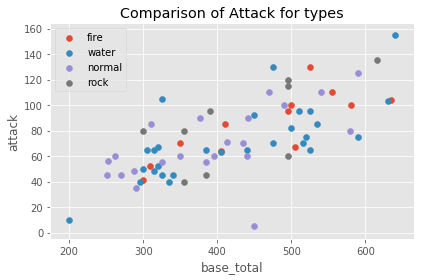

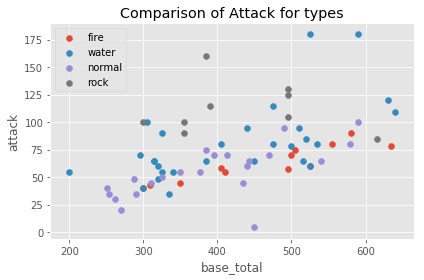

In [31]:
"""
To help answer this lets take a few types and compare a few of their parameters against base_total
"""
type1 = ["fire", "water", "normal", "rock"]
params = ["attack", "defense"]

for p in params:
    plotScatter2(df, type1, "Comparison of " + p, "base_total", p, p)


 From the plots above we can see there is no clear dominat parameter. Generally, this a poor question for the given data. The overall strength is based on the sum of various parameters. If we saw that the types demonstrate a rather equivalent playing field and we know different types excel at different things (attack or defense) we can't really determine one stat more important. The higher of the particular stat will weight more but that is dependent on different types. Additionally, overall strength is partially dependent on how it will be used. For example if a battle simulation only considers attack and defense, the other variables are meaningless and only those two should be considered for overall strength.

 ### Where do the elite four Pokémon stand against other Pokémon?

 By looking at Task 4 and 6 we determined that the elite for Pokemon tend to stand at the high end of the percentrile range (~80-95, when considering the mean to max values), when using base_total as a measure of strength. This is expected, the elite four are the last opponents you face in the game, they should have strong pokemon.

 ### Can you simulate a mock battle to determine outcome?

In [32]:
# PokeBattle has a class called PokeBattle1 which takes a list of pokemon
# A method called startBattle will simulate a simple battle against the elite 4 pokemon
battle = PokeBattle.PokeBattle1(dream_team)
battle.startBattle()




Challenger: Mewtwo vs. Lance: Gyarados
Mewtwo: 106hp vs Gyarados: 95hp
Mewtwo fainted
Gyarados is the winner


Challenger: Gyarados vs. Lance: Gyarados
Gyarados: 95hp vs Gyarados: 13hp
Gyarados fainted
Gyarados is the winner


Challenger: Gyarados vs. Lance: Dragonair
Gyarados: 95hp vs Dragonair: 61hp
Dragonair fainted
Gyarados is the winner


Challenger: Gyarados vs. Lance: Aerodactyl
Gyarados: 95hp vs Aerodactyl: 80hp
Aerodactyl fainted
Gyarados is the winner


Challenger: Gyarados vs. Lance: Dragonite
Gyarados: 69hp vs Dragonite: 91hp
Dragonite fainted
Gyarados is the winner

Trainer Lance is out of pokemon


In [33]:
# By the trainer Lance running out of pokemon before the challenger, 
# we can determine this line up to be capable of defeating an elite4 member. 
#
# Also note that PokeBattle is incomplete, ideally all trainers would be faced 
# but there is some problems with the data set resetting before each fight. 


 ### What limitations are there?
 There were a couple of bad assumptions made, that weren't clear until the end on how important they were. First of all, overall strength was assummed by a summation of various variables. Testing that strength was based on a simulated battle (PokeBattle lib). However, due to some simplification made, only hp, attack and defense were used in the battle simulation. This means any additional variables used were not relevent in assessing strength. From the above analysis, we know that higher hp, attack and defense lead to higher total strength, so the battle simulation still could work out but that would be more by coincidence not necessarily by data analysis. Picking Pokemon with the higher attack or defense would have made more sense in this scenario. Additionally, the types have strength and weaknesses against each other that were not accounted for. A true dream team would need to account for all of the above. Finally, this analysis was limited to generation 1 pokemon, there are still multiple generations that could have been included and may change some of the conclusions determined here.